## Prepare

In [1]:
import pandas as pd

import configparser
config = configparser.ConfigParser()
import boto3

# Your Code Here

ModuleNotFoundError: No module named 'boto3'

In [ ]:
config.read('aws.cfg')

['aws.cfg']

In [2]:
AWS_ACCESS_KEY = config['AWS']['aws_access_key']
AWS_SECRET_KEY = config['AWS']['aws_secret_key']


KeyError: 'AWS'

In [89]:
# establish your S3 client 
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-creating-buckets.html
# make sure to pass your credentials: aws_access_key_id and aws_secret_access_key
s3client = boto3.client('s3', aws_access_key_id = AWS_ACCESS_KEY, aws_secret_access_key = AWS_SECRET_KEY)

In [90]:
response = s3client.list_buckets()

ClientError: An error occurred (InvalidAccessKeyId) when calling the ListBuckets operation: The AWS Access Key Id you provided does not exist in our records.

## Extract Data

In [85]:
# Read the CSV file 
df = pd.read_csv('s3://techcatalyst-raw/SalesRaw/sales_data.csv', storage_options= {
                         'key': AWS_ACCESS_KEY,
                         'secret': AWS_SECRET_KEY
                     })
df.head()

PermissionError: Forbidden

In [10]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,NaN,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,NaN,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,NaN,Germany,David


In [11]:
df.describe(include='all')

,DateTime,Time Zone,Sales Amount,Country,Sales Person
count,10000,10000,5951,10000,10000
unique,9913,5,3905,5,5
top,2024-01-26 13:39:00,UTC,?,United Kingdom,Eve
freq,3,2046,2025,2046,2041


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DateTime      10000 non-null  object
 1   Time Zone     10000 non-null  object
 2   Sales Amount  5951 non-null   object
 3   Country       10000 non-null  object
 4   Sales Person  10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


## Extract and Transform

In [17]:
# Read the file agian, but now by better identifying the potential NA values, also Parse the DateTime. Do it in one step while reading the file

df = pd.read_csv('s3://techcatalyst-raw/SalesRaw/sales_data.csv', parse_dates=['DateTime'], storage_options= {'key': AWS_ACCESS_KEY,'secret': AWS_SECRET_KEY},na_values={'?'})

In [18]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,NaN,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,NaN,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,NaN,Germany,David


In [19]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,NaN,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,NaN,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,NaN,Germany,David


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  3926 non-null   float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  3926 non-null   float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [21]:
df.describe()

,DateTime,Sales Amount
count,10000,3926.000000
mean,2024-07-01 02:47:21.606000128,15572.928839
min,2024-01-01 00:01:00,10.380000
25%,2024-03-31 14:52:45,514.525000
50%,2024-06-30 13:37:00,10891.170000
75%,2024-09-30 05:46:45,30655.217500
max,2024-12-30 21:37:00,49996.820000
std,NaN,16922.555911


In [275]:
df.describe()

,DateTime,Sales Amount
count,10000,3926.000000
mean,2024-07-01 02:47:21.606000128,15572.928839
min,2024-01-01 00:01:00,10.380000
25%,2024-03-31 14:52:45,514.525000
50%,2024-06-30 13:37:00,10891.170000
75%,2024-09-30 05:46:45,30655.217500
max,2024-12-30 21:37:00,49996.820000
std,NaN,16922.555911


In [33]:
# Remove outlier values in Sales. Later you will learn how to statistically determine outliers. For now, an SME told you the threshold is 37,000
threshold = 37000
df.loc[df['Sales Amount'] > threshold, 'Sales Amount'] = pd.NA
# now replace the outlier values with pd.NA 
# Your code
df

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,NaN,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,NaN,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,NaN,Germany,David
...,...,...,...,...,...
9995,2024-11-18 14:35:00,Europe/Berlin,NaN,Germany,Bob
9996,2024-05-04 10:13:00,Asia/Tokyo,287.35,Japan,Bob
9997,2024-03-07 03:51:00,Australia/Sydney,NaN,Australia,Bob
9998,2024-10-26 04:30:00,Australia/Sydney,175.50,Australia,Eve


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  3252 non-null   float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  3252 non-null   float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [36]:
# Replace all null values with the overall mean 
# 9829.400738007382
average = df['Sales Amount'].mean()
average

9829.400738007382

In [37]:
# Now fill all NA values with that mean
# Your code here
df['Sales Amount'] = df['Sales Amount'].fillna(value=average)

In [38]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.400738,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.740000,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.400738,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.380000,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.400738,Germany,David


In [280]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.400738,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.740000,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.400738,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.380000,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.400738,Germany,David


In [39]:
# You will need to round the Sale Amount now to 2 decimal places 

# Your code here 
df = df.round({'Sales Amount': 2})
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.40,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.40,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.40,Germany,David


In [281]:

df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.40,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.40,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.40,Germany,David


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  10000 non-null  float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  10000 non-null  float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [41]:
df.describe()

,DateTime,Sales Amount
count,10000,10000.000000
mean,2024-07-01 02:47:21.606000128,9829.400240
min,2024-01-01 00:01:00,10.380000
25%,2024-03-31 14:52:45,9829.400000
50%,2024-06-30 13:37:00,9829.400000
75%,2024-09-30 05:46:45,9829.400000
max,2024-12-30 21:37:00,36959.150000
std,NaN,7001.282356


In [42]:
df.describe()

,DateTime,Sales Amount
count,10000,10000.000000
mean,2024-07-01 02:47:21.606000128,9829.400240
min,2024-01-01 00:01:00,10.380000
25%,2024-03-31 14:52:45,9829.400000
50%,2024-06-30 13:37:00,9829.400000
75%,2024-09-30 05:46:45,9829.400000
max,2024-12-30 21:37:00,36959.150000
std,NaN,7001.282356


In [43]:
df['Time Zone'].unique()

array(['Australia/Sydney', 'Europe/Berlin', 'Asia/Tokyo', 'UTC',
       'US/Eastern'], dtype=object)

In [284]:
df['Time Zone'].unique()

array(['Australia/Sydney', 'Europe/Berlin', 'Asia/Tokyo', 'UTC',
       'US/Eastern'], dtype=object)

In [44]:
df

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.40,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.40,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.40,Germany,David
...,...,...,...,...,...
9995,2024-11-18 14:35:00,Europe/Berlin,9829.40,Germany,Bob
9996,2024-05-04 10:13:00,Asia/Tokyo,287.35,Japan,Bob
9997,2024-03-07 03:51:00,Australia/Sydney,9829.40,Australia,Bob
9998,2024-10-26 04:30:00,Australia/Sydney,175.50,Australia,Eve


In [46]:
# you will need to drop two rows have will cause an issue. They have been identified as index 9723 and index 9373

df = df.drop([9723, 9373])
df

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.40,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.40,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.40,Germany,David
...,...,...,...,...,...
9995,2024-11-18 14:35:00,Europe/Berlin,9829.40,Germany,Bob
9996,2024-05-04 10:13:00,Asia/Tokyo,287.35,Japan,Bob
9997,2024-03-07 03:51:00,Australia/Sydney,9829.40,Australia,Bob
9998,2024-10-26 04:30:00,Australia/Sydney,175.50,Australia,Eve


In [48]:
# Localize each DateTime with the corresponding Time Zone.
# Hint, you can use df.apply and Lambda function
# t.tz_localize('UTC').tz_convert('US/Pacific')

df['DateTime_Localized'] = df.apply(lambda row: row['DateTime'].tz_localize(row['Time Zone']).tz_convert(row['Time Zone']), axis=1)


### Testing/Validation

In [49]:
df['DateTime'][0]

Timestamp('2024-06-15 05:56:00')

In [288]:
df['DateTime'][0]

Timestamp('2024-06-15 05:56:00')

In [50]:
df['DateTime_Localized'][0]

Timestamp('2024-06-15 05:56:00+1000', tz='Australia/Sydney')

In [289]:
df['DateTime_Localized'][0]

Timestamp('2024-06-15 05:56:00+1000', tz='Australia/Sydney')

In [51]:
df['DateTime'][1]

Timestamp('2024-09-30 05:36:00')

In [290]:
df['DateTime'][1]

Timestamp('2024-09-30 05:36:00')

In [52]:
df['DateTime_Localized'][1]

Timestamp('2024-09-30 05:36:00+0200', tz='Europe/Berlin')

In [291]:
df['DateTime_Localized'][1]

Timestamp('2024-09-30 05:36:00+0200', tz='Europe/Berlin')

In [55]:
# Now, that you have localized, convert each DateTime_Localized to UTC Format
# Hint, think about using df.apply and a lambda function
df['DateTime_UTC'] = df.apply(lambda row: row['DateTime_Localized'].tz_convert('UTC'), axis=1)
 


### Testing/ Validation

In [56]:
df['DateTime_Localized'][0]

Timestamp('2024-06-15 05:56:00+1000', tz='Australia/Sydney')

In [293]:
df['DateTime_Localized'][0]

Timestamp('2024-06-15 05:56:00+1000', tz='Australia/Sydney')

In [57]:
df['DateTime_UTC'][0]

Timestamp('2024-06-14 19:56:00+0000', tz='UTC')

In [294]:
df['DateTime_UTC'][0]

Timestamp('2024-06-14 19:56:00+0000', tz='UTC')

In [58]:
df['DateTime_Localized'][1]

Timestamp('2024-09-30 05:36:00+0200', tz='Europe/Berlin')

In [295]:
df['DateTime_Localized'][1]

Timestamp('2024-09-30 05:36:00+0200', tz='Europe/Berlin')

In [59]:
df['DateTime_UTC'][1]

Timestamp('2024-09-30 03:36:00+0000', tz='UTC')

In [296]:
df['DateTime_UTC'][1]

Timestamp('2024-09-30 03:36:00+0000', tz='UTC')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   DateTime            9998 non-null   datetime64[ns]     
 1   Time Zone           9998 non-null   object             
 2   Sales Amount        9998 non-null   float64            
 3   Country             9998 non-null   object             
 4   Sales Person        9998 non-null   object             
 5   DateTime_Localized  9998 non-null   object             
 6   DateTime_UTC        9998 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(4)
memory usage: 882.9+ KB


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   DateTime            9998 non-null   datetime64[ns]     
 1   Time Zone           9998 non-null   object             
 2   Sales Amount        9998 non-null   float64            
 3   Country             9998 non-null   object             
 4   Sales Person        9998 non-null   object             
 5   DateTime_Localized  9998 non-null   object             
 6   DateTime_UTC        9998 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(4)
memory usage: 882.9+ KB


### Analysis / Validation

In [62]:
SalesByCountry = df.groupby('Country')['Sales Amount'].sum()
SalesByCountry

Country
Australia         18548078.80
Germany           19862156.50
Japan             19638421.38
United Kingdom    19945753.23
United States     20289638.47
Name: Sales Amount, dtype: float64

In [302]:
SalesByCountry = df.groupby('Country')['Sales Amount'].sum()
SalesByCountry

Country
Australia         18548078.80
Germany           19862156.50
Japan             19638421.38
United Kingdom    19945753.23
United States     20289638.47
Name: Sales Amount, dtype: float64

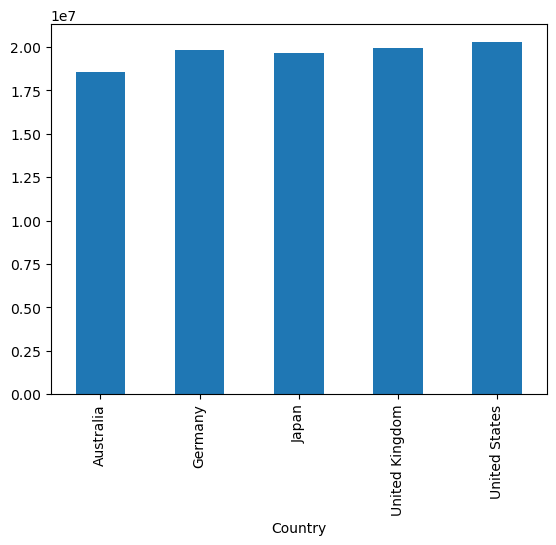

In [63]:
SalesByCountry.plot(kind='bar');

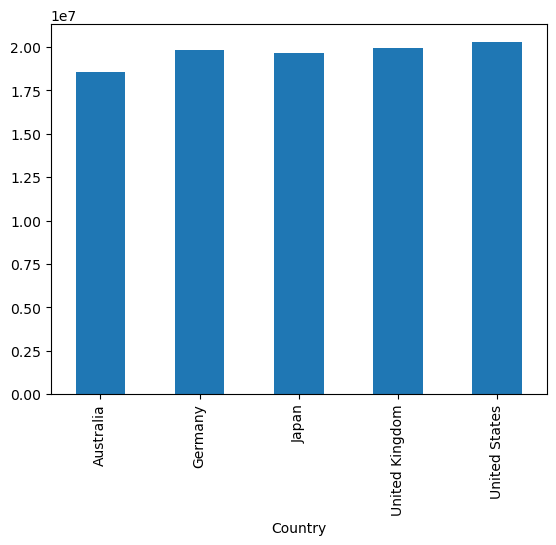

In [303]:
SalesByCountry.plot(kind='bar');

In [65]:
SalesBySP = df.groupby('Sales Person')['Sales Amount'].sum()
SalesBySP

Sales Person
Alice      20216678.02
Bob        19432012.45
Charlie    18415351.28
David      20147755.70
Eve        20072250.93
Name: Sales Amount, dtype: float64

In [304]:
SalesBySP = df.groupby('Sales Person')['Sales Amount'].sum()
SalesBySP

Sales Person
Alice      20216678.02
Bob        19432012.45
Charlie    18415351.28
David      20147755.70
Eve        20072250.93
Name: Sales Amount, dtype: float64

<Axes: xlabel='Sales Person'>

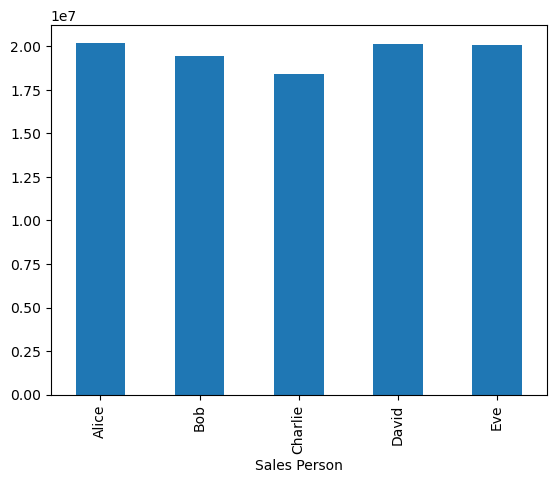

In [305]:
SalesBySP.plot(kind='bar')

## Load

In [66]:
# Finally write the data to S3 
# Parition by Country

# Your code here

file = 's3://techcatalyst-transformed/SalesTransformed/sriya/sales_data_transformed.parquet'
    

df.to_parquet(file, partition_cols=['Country'],
              storage_options={
                   'key' : AWS_ACCESS_KEY,
                   'secret' : AWS_SECRET_KEY
               }
             )
print('done')


PermissionError: The AWS Access Key Id you provided does not exist in our records.